In [37]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import sys
from pathlib import Path
src = Path.cwd().parent 
sys.path.append(str(src))
import dlib
import cv2

from preprocessing.preprocessing_utils import _get_frame_landmarks, segment_forehead, _get_kovac_mask_for_frame
from models.unsupervised_models import *
from postprocessing.postprocessing import *


plt.style.use('ggplot')

In [13]:
with h5py.File(r'D:\image_processing_course_project\UBFC-RPPG\preprocessed_data\videos_all.h5') as f:
    frame = np.array(f['subject4'][0])

In [16]:
def imshow(image):
    plt.imshow(image)
    plt.axis('off')
    plt.grid('off')
    plt.show()

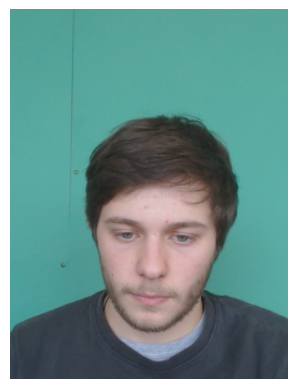

In [17]:
imshow(frame)

In [19]:
predictor_path = str(src / 'external_utils/shape_predictor_81_face_landmarks.dat')
face_detector = dlib.get_frontal_face_detector()
landmark_predictor = dlib.shape_predictor(predictor_path)

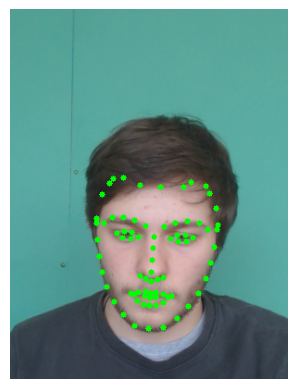

In [28]:
annotated = frame.copy()
lms = _get_frame_landmarks(frame, face_detector, landmark_predictor)
for lm in lms:
    cv2.circle(annotated, lm, 3, (0, 255, 0), -1)
imshow(annotated)

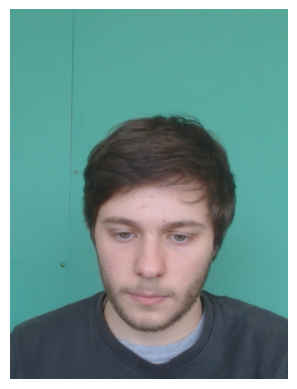

In [44]:
with h5py.File(r'D:\image_processing_course_project\UBFC-RPPG\preprocessed_data\videos_all.h5') as f:
    frame = np.array(f['subject4'][50])
imshow(frame)

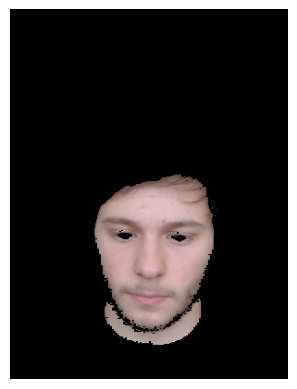

In [45]:
mask = _get_kovac_mask_for_frame(frame)
maskrgb = np.stack([mask] * 3, axis=-1)
imshow(maskrgb * frame)